# Capstone Project on H1 VISA Status Prediction using Machine Learning Models
### By Sai Charan Gadiraju

## Project Objective

The primary objective of this data science project is to explore, analyze, and gain insights from the data for the fiscal years 2017-2022. I aim to answer various research questions, uncover trends, and provide valuable information.

# Research Questions

"What are the trends and patterns in H1B visa applications in the United States from 2017 to 2022, focusing on factors such as the overall growth in the number of applications, the top companies providing H1B sponsorships, key roles in demand, salary distributions for these roles, characteristics of data-related roles, acceptance and rejection rates, and geographical concentrations of applications across different parts of the United States?"

# Data

The dataset consists of last six years information (2017-2022)
- Source: Dataset Source U.S. Department of Labor, ETA
- Data Size: 454.7+ MB
- Data Shape (Number of Rows and Columns): Number of rows: 3973349, Number of columns: 14

Every row describes applicant information.

### Columns:

1. Visa_Class - It typically refers to the category or type of visa that an individual is applying for, such as H-1B, H-1B1, E-3, etc.
2. EMPLOYER_NAME - Legal business name of employer requesting permanent labor certification.
3. SOC_Title - It refers to the Standard Occupational Classification (SOC) title, which is a standardized system used to classify and categorize occupations in the United States.
4. Job_Title - It refers to the specific designation or title associated with a particular employment position held by an individual, often indicating the nature or type of work they perform within an organization.
5. Full_Time_Position - It typically denotes whether a job or position is designated as a full-time role, indicating that the employee is expected to work a standard number of hours per week, usually 35-40 hours, depending on the organization's policy.
6. Worksite - "Worksite" refers to the physical location or geographical site where an employee performs their job duties. In the context of visa applications, it could represent the specific location or address of the employer where the work is primarily carried out.
7. Prevailing_Wage - "Prevailing_Wage" is the average wage paid to similarly employed workers in a specific occupation in a particular geographic area, as determined by the U.S. Department of Labor. It serves as a baseline to ensure that foreign workers are not being paid less than the average for their job and location.
8. Unit_Of_Pay - It refers to the measurement or basis used to specify the compensation for a particular job, such as hourly, weekly, monthly, or annually. It indicates how the salary or wage for a position is calculated and presented.
9. Employer_Location - It refers to the geographic location or address where the employer's main office or headquarters is situated.
10. Employer_Country - It refers to the country where the employer is based or headquartered. It signifies the home country of the organization submitting the visa application.
11. CASE_STATUS - Status associated with the last significant event or decision. Valid values include “Certified”, “Certified-Expired”, “Denied”, and “Withdrawn”.
12. Year - It indicates the year of applications.
13. Target Variable- CASE_STATUS - Valid values include “Certified”, “Certified-Expired”, “Denied”, and “Withdrawn”


## 1. Understanding the Dataset:

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from IPython import display
from matplotlib.pyplot import plot
from IPython.display import Image

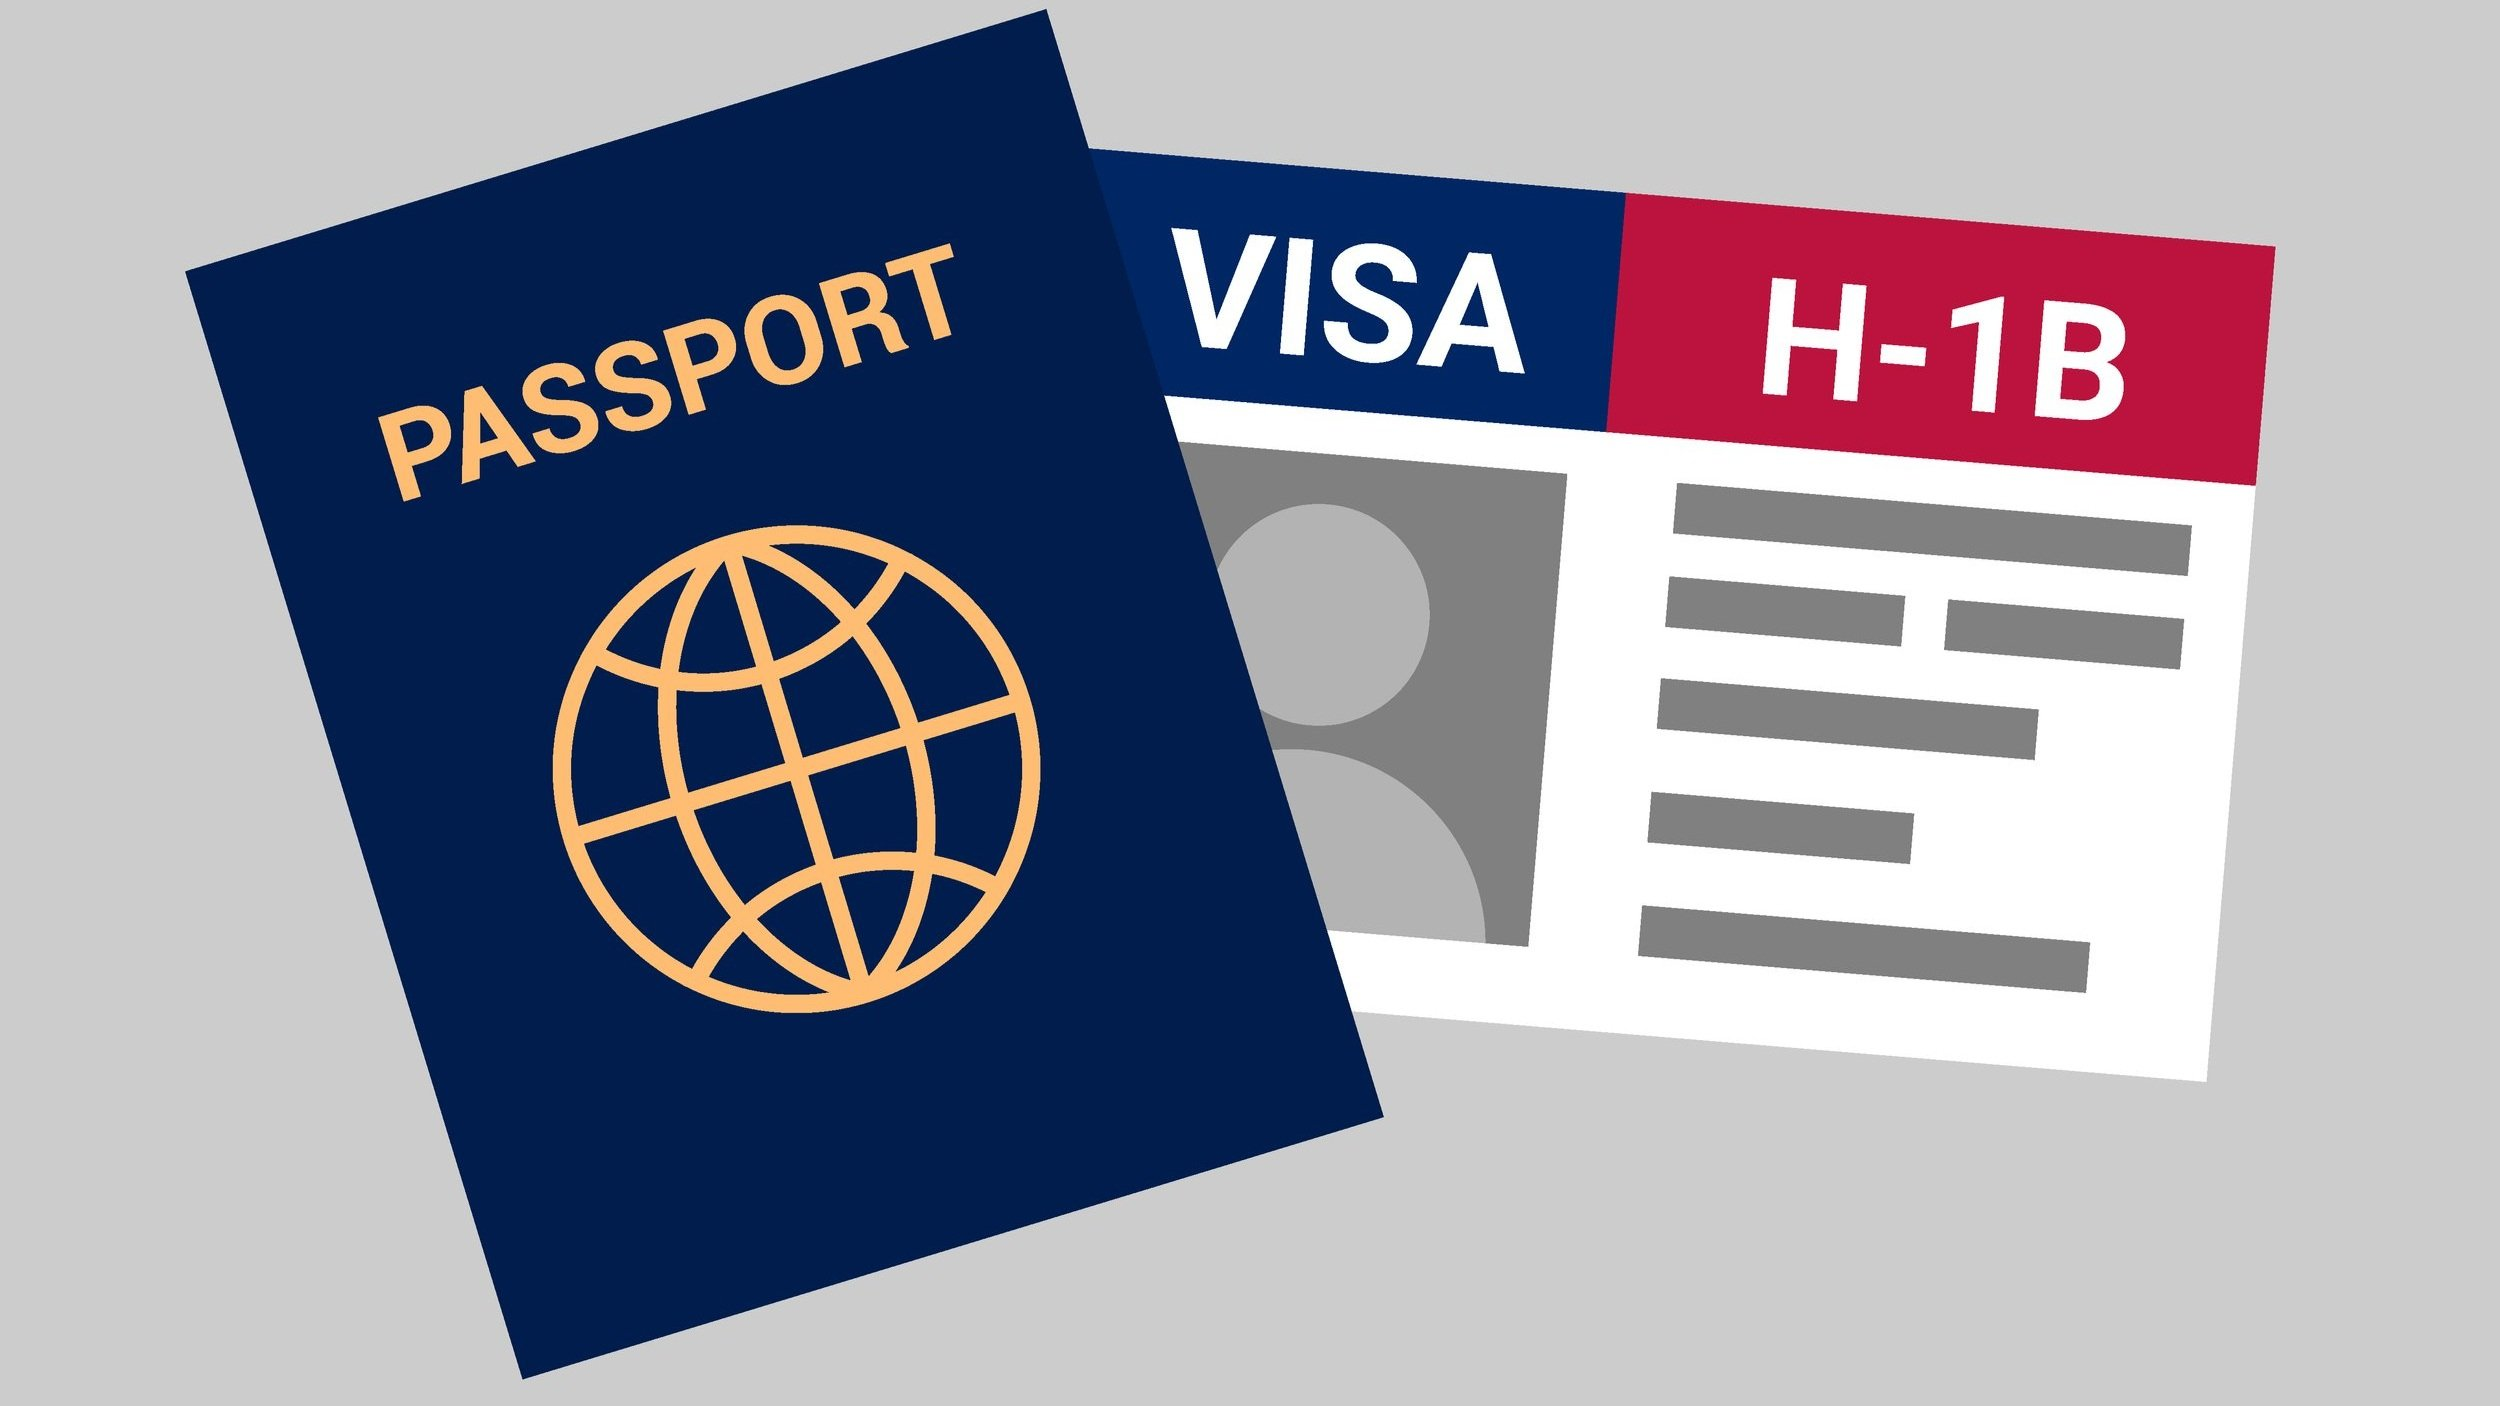

In [2]:
# Specifying the full path to the image
image_path = "C:/Users/SAI CHARAN/Downloads/visa_h1b_13.jpg"

# Displaying the image
Image(filename=image_path)

### 1.1 Loading the dataset and understanding its structure.

In [3]:
#Creating the dataframe for all the years separately.

df_2017 = pd.read_csv("downloads/archive/LCA_FY_2017.csv")
df_2018 = pd.read_csv("downloads/archive/LCA_FY_2018.csv")
df_2019 = pd.read_csv("downloads/archive/LCA_FY_2019.csv")
df_2020 = pd.read_csv("downloads/archive/LCA_FY_2020.csv")
df_2021 = pd.read_csv("downloads/archive/LCA_FY_2021.csv")
df_2022 = pd.read_csv("downloads/archive/LCA_FY_2022.csv")

C:\Users\SAI CHARAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#printing the rows and columns

print(f'Rows and Columns for year 2017 - {df_2017.shape}',
f'\nRows and Columns for year 2018 - {df_2018.shape}',
f'\nRows and Columns for year 2019 - {df_2019.shape}',
f'\nRows and Columns for year 2020 - {df_2020.shape}',
f'\nRows and Columns for year 2021 - {df_2021.shape}',
f'\nRows and Columns for year 2022 - {df_2022.shape}')

Rows and Columns for year 2017 - (624650, 11) 
Rows and Columns for year 2018 - (654360, 11) 
Rows and Columns for year 2019 - (664616, 11) 
Rows and Columns for year 2020 - (577334, 12) 
Rows and Columns for year 2021 - (826305, 12) 
Rows and Columns for year 2022 - (626084, 12)


In [5]:
# Add a "Year" column to each DataFrame
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022

Looking at the columns, data types, and basic statistics to get a sense of the data.

In [6]:
# List of dataframes
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# Print info for each dataframe
for i, df in enumerate(dfs, 1):
    print(f"DataFrame {i} Info:")
    print(df.info())

DataFrame 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Visa_Class          624650 non-null  object 
 1   Employer_Name       624594 non-null  object 
 2   SOC_Title           624647 non-null  object 
 3   Job_Title           624645 non-null  object 
 4   Full_Time_Position  624645 non-null  object 
 5   Worksite            624629 non-null  object 
 6   Prevailing_Wage     624649 non-null  float64
 7   Unit_Of_Pay         624604 non-null  object 
 8   Employer_Location   624620 non-null  object 
 9   Employer_Country    528143 non-null  object 
 10  Case_Status         624650 non-null  object 
 11  Year                624650 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 57.2+ MB
None
DataFrame 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data c

Checking Target columns value - Case_Status

In [7]:
# Create a function to get unique values from the "Case status" column
def get_unique_case_status_values(df):
    return df['Case_Status'].unique()

# Extract and print unique values for each dataframe
for i, df in enumerate([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]):
    unique_values = get_unique_case_status_values(df)
    print(f"Unique values in df_{2017 + i} (Year {2017 + i}):")
    for value in unique_values:
        print(value)
    print()

Unique values in df_2017 (Year 2017):
CERTIFIED-WITHDRAWN
WITHDRAWN
CERTIFIED
DENIED

Unique values in df_2018 (Year 2018):
CERTIFIED
DENIED
WITHDRAWN
CERTIFIED-WITHDRAWN

Unique values in df_2019 (Year 2019):
WITHDRAWN
CERTIFIED-WITHDRAWN
CERTIFIED
DENIED

Unique values in df_2020 (Year 2020):
CERTIFIED
CERTIFIED-WITHDRAWN
DENIED
WITHDRAWN

Unique values in df_2021 (Year 2021):
CERTIFIED
Certified - Withdrawn
Denied
Withdrawn

Unique values in df_2022 (Year 2022):
Certified
Certified - Withdrawn
Denied
Withdrawn



The values are different for the year 2021, and 2022.

In [8]:
# Replace 'Certified' with 'CERTIFIED' in the 'Case_Status' column
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Certified', 'CERTIFIED')

# Replace 'Certified - Withdrawn' with 'CERTIFIED-WITHDRAWN' in the 'Case_Status' column
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Certified - Withdrawn', 'CERTIFIED-WITHDRAWN')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Certified - Withdrawn', 'CERTIFIED-WITHDRAWN')

# Replace 'Denied' with 'DENIED' in the 'Case_Status' column
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Denied', 'DENIED')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Denied', 'DENIED')

# Replace 'Withdrawn' with 'WITHDRAWN' in the 'Case_Status' column
df_2021['Case_Status'] = df_2021['Case_Status'].replace('Withdrawn', 'WITHDRAWN')
df_2022['Case_Status'] = df_2022['Case_Status'].replace('Withdrawn', 'WITHDRAWN')

merging all the six year data into one dataframe

In [9]:
merged_df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)

In [10]:
#printing the head of merged dataframe
merged_df.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Year,Quarter
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.0,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.0,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.0,Year,"Washington, District of Columbia",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.0,Year,"Livonia, Michigan",United States Of America,WITHDRAWN,2017,NaN
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.0,Year,"Wilson, North Carolina",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3973349 entries, 0 to 626083
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Visa_Class          object 
 1   Employer_Name       object 
 2   SOC_Title           object 
 3   Job_Title           object 
 4   Full_Time_Position  object 
 5   Worksite            object 
 6   Prevailing_Wage     float64
 7   Unit_Of_Pay         object 
 8   Employer_Location   object 
 9   Employer_Country    object 
 10  Case_Status         object 
 11  Year                int64  
 12  Quarter             object 
dtypes: float64(1), int64(1), object(11)
memory usage: 424.4+ MB


In [12]:
print("The shape of the dataset is : {}".format(merged_df.shape))

The shape of the dataset is : (3973349, 13)


In [13]:
print("There were around {} applications for H-1B Visa from 2017 to 2022.".format(merged_df.shape[0]))

There were around 3973349 applications for H-1B Visa from 2017 to 2022.


## 2. Data Cleaning and Pre-Processing:

In [14]:
merged_df.isnull().sum(axis = 0)

Visa_Class                  0
Employer_Name              92
SOC_Title                  20
Job_Title                  12
Full_Time_Position         11
Worksite               581157
Prevailing_Wage          1973
Unit_Of_Pay              2072
Employer_Location         537
Employer_Country       124658
Case_Status                 0
Year                        0
Quarter               1943626
dtype: int64

There are null values for the columns- Employer_Name, SOC_Title, Job_Title, Full_Time_Position, Worksite, Prevailing_Wage, Unit_Of_Pay, Employer_Location, Employer_Country, Quarter

- Convert 'Year' to Integer: Converts the 'Year' column in the DataFrame to integer data type.

- Uppercase 'Employer_Name': Converts all strings in the 'Employer_Name' column to uppercase.

- Uppercase 'SOC_Title': Converts all strings in the 'SOC_Title' column to uppercase.

- Uppercase 'Job_Title': Converts all strings in the 'Job_Title' column to uppercase.

- Uppercase 'Full_Time_Position': Converts all strings in the 'Full_Time_Position' column to uppercase.

- Uppercase 'Worksite': Converts all strings in the 'Worksite' column to uppercase.

In [15]:
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df['Employer_Name'] = merged_df['Employer_Name'].str.upper()
merged_df['SOC_Title'] = merged_df['SOC_Title'].str.upper()
merged_df['Job_Title'] = merged_df['Job_Title'].str.upper()
merged_df['Full_Time_Position'] = merged_df['Full_Time_Position'].str.upper()
merged_df['Worksite'] = merged_df['Worksite'].str.upper()

## 3. EDA

### 3.1 Number of petitions per Case Status

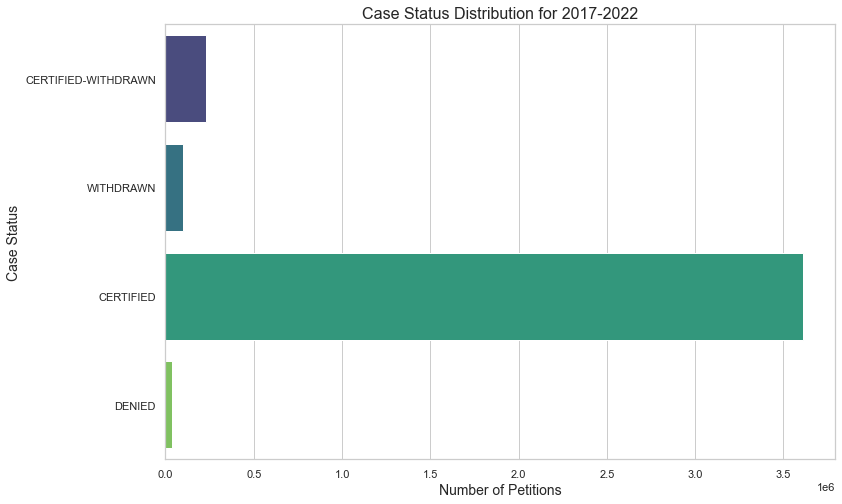

CERTIFIED              3611457
CERTIFIED-WITHDRAWN     227347
WITHDRAWN               100097
DENIED                   34448
Name: Case_Status, dtype: int64


In [19]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting using seaborn with larger fonts
plt.figure(figsize=(12, 8))
sns.countplot(y='Case_Status', data=merged_df, palette='viridis')

# Set title and labels with larger fonts
plt.title('Case Status Distribution for 2017-2022', fontsize=16)
plt.xlabel('Number of Petitions', fontsize=14)
plt.ylabel('Case Status', fontsize=14)

# Show the plot
plt.show()

# Print the value counts
print(merged_df['Case_Status'].value_counts())

The above bar chart shows the case status vs number of petitions for 2017-2022.
- There are four values for case status column.
- There are total of 3611457 petitions for 'CERTIFIED', 227347 for 'CERTIFIED-WITHDRAWN', 100097 for 'WITHDRAWN', and 34448 for 'DENIED'.

### 3.2 Total number of Applications per year

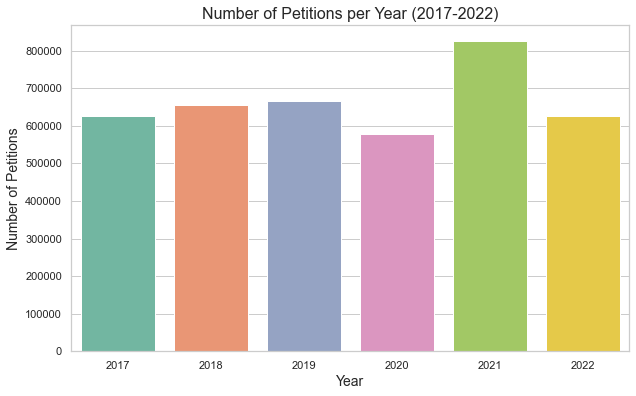

2021    826305
2019    664616
2018    654360
2022    626084
2017    624650
2020    577334
Name: Year, dtype: int64


In [23]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting using seaborn for better visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=merged_df, palette='Set2')

# Set title and labels
plt.title('Number of Petitions per Year (2017-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Petitions', fontsize=14)

# Show the plot
plt.show()

# Print the value counts
print(merged_df['Year'].value_counts())

- The year 2021 has the highest number of applications '826305'.
- Almost for the year 2022, 2019, 2018, and 2017 the number of applications are same.
- The least is in the year 2020, maybe there can be few reasons as one of them is COVID pandemic.

### 3.3 The top 15 employers filing the H1-B visa petitions

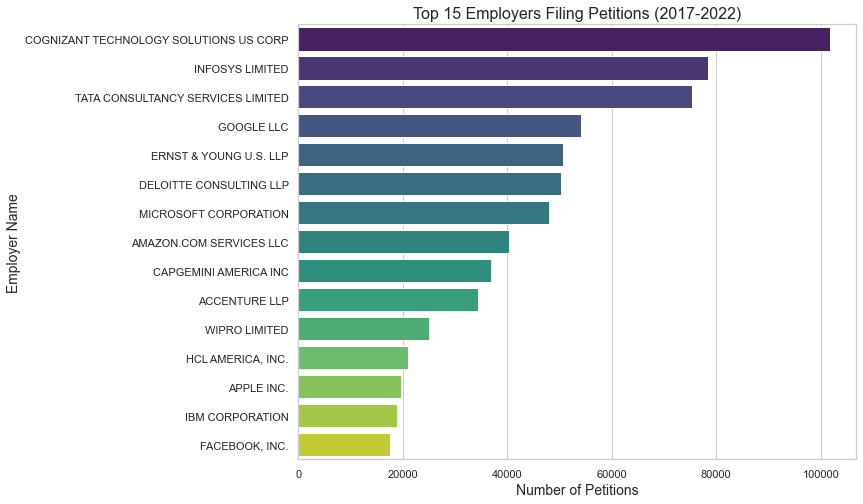

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    101726
INFOSYS LIMITED                            78400
TATA CONSULTANCY SERVICES LIMITED          75315
GOOGLE LLC                                 54089
ERNST & YOUNG U.S. LLP                     50573
DELOITTE CONSULTING LLP                    50262
MICROSOFT CORPORATION                      47911
AMAZON.COM SERVICES LLC                    40356
CAPGEMINI AMERICA INC                      36973
ACCENTURE LLP                              34332
WIPRO LIMITED                              24988
HCL AMERICA, INC.                          21084
APPLE INC.                                 19577
IBM CORPORATION                            18918
FACEBOOK, INC.                             17502
Name: Employer_Name, dtype: int64


In [26]:
# Set the style for the plot
sns.set(style="whitegrid")

# Get the top 15 employers
top_employers = merged_df['Employer_Name'].value_counts().head(15)

# Plotting using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=top_employers.values, y=top_employers.index, palette='viridis')

# Set title and labels
plt.title('Top 15 Employers Filing Petitions (2017-2022)', fontsize=16)
plt.xlabel('Number of Petitions', fontsize=14)
plt.ylabel('Employer Name', fontsize=14)

# Show the plot
plt.show()

# Print the value counts
print(top_employers)

- Cognizant, Infosys Ltd, and Tata Consultancy are among the Top 3 employers filing for H1B.
- Also the Top Giant, Google, Amazon, and microsoft filed more than the average petitions.

### 3.4 The top 15 SOC names for which H1-B visas are raised

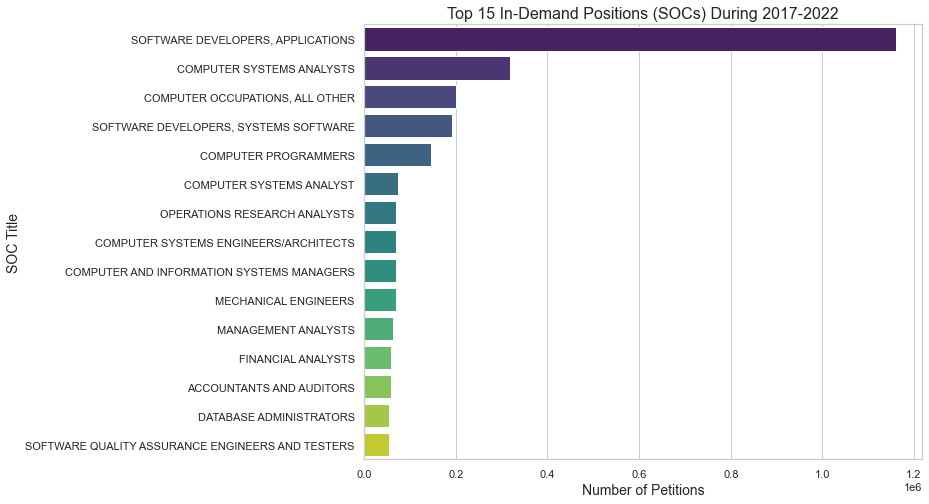

SOFTWARE DEVELOPERS, APPLICATIONS                   1159983
COMPUTER SYSTEMS ANALYSTS                            317383
COMPUTER OCCUPATIONS, ALL OTHER                      200489
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                192601
COMPUTER PROGRAMMERS                                 144969
COMPUTER SYSTEMS ANALYST                              73916
OPERATIONS RESEARCH ANALYSTS                          70073
COMPUTER SYSTEMS ENGINEERS/ARCHITECTS                 69590
COMPUTER AND INFORMATION SYSTEMS MANAGERS             69184
MECHANICAL ENGINEERS                                  69021
MANAGEMENT ANALYSTS                                   61903
FINANCIAL ANALYSTS                                    58634
ACCOUNTANTS AND AUDITORS                              58214
DATABASE ADMINISTRATORS                               55056
SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS      53827
Name: SOC_Title, dtype: int64


In [27]:
# Set the style for the plot
sns.set(style="whitegrid")

# Get the top 15 SOC titles
top_soc_titles = merged_df['SOC_Title'].value_counts().head(15)

# Plotting using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=top_soc_titles.values, y=top_soc_titles.index, palette='viridis')

# Set title and labels
plt.title('Top 15 In-Demand Positions (SOCs) During 2017-2022', fontsize=16)
plt.xlabel('Number of Petitions', fontsize=14)
plt.ylabel('SOC Title', fontsize=14)

# Show the plot
plt.show()

# Print the value counts
print(top_soc_titles)

- Software Developers are among the Top in demand positions. There is a huge difference between Top 2 demand positions.
- We can see the trend is towards the information technology related positions that have been filed for H1B visas during 2017-2022.

### 3.5 Acceptance rate of the H1-B Visa petitions through different years

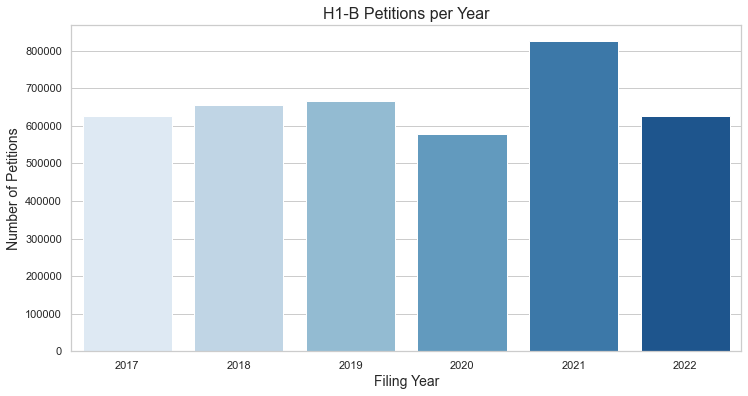

2017    545694
2018    579449
2019    592103
2020    545621
2021    772369
2022    576221
Name: Year, dtype: int64
2017    624650
2018    654360
2019    664616
2020    577334
2021    826305
2022    626084
Name: Year, dtype: int64


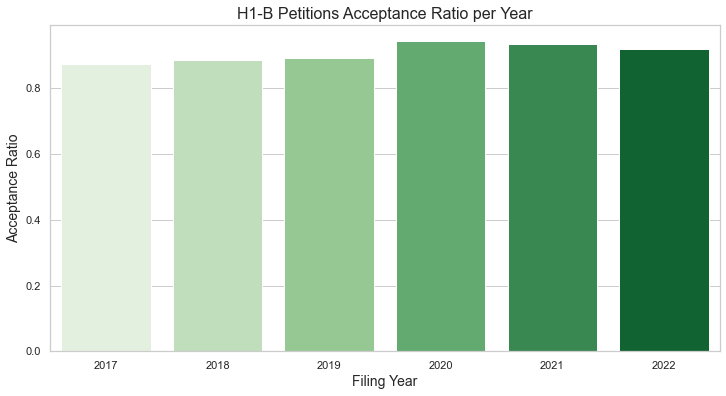

In [28]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the number of petitions per year
dfplot_status_fyear = pd.DataFrame(merged_df['Year'].value_counts().sort_index())
plt.figure(figsize=(12, 6))
plot_status_fyear = sns.barplot(x=dfplot_status_fyear.index, y='Year', data=dfplot_status_fyear, palette='Blues')
plt.title('H1-B Petitions per Year', fontsize=16)
plt.xlabel('Filing Year', fontsize=14)
plt.ylabel('Number of Petitions', fontsize=14)
plt.show()

# Print the value counts for CERTIFIED cases per year
print(merged_df[merged_df['Case_Status'] == 'CERTIFIED'].Year.value_counts().sort_index())
print(merged_df.Year.value_counts().sort_index())

# Plotting the acceptance ratio per year
dfstatus_acceptance_peryear = pd.DataFrame(merged_df[merged_df['Case_Status'] == 'CERTIFIED'].Year.value_counts() / merged_df.Year.value_counts()).sort_index()
plt.figure(figsize=(12, 6))
status_acceptance_peryear = sns.barplot(x=dfstatus_acceptance_peryear.index, y='Year', data=dfstatus_acceptance_peryear, palette='Greens')
plt.title('H1-B Petitions Acceptance Ratio per Year', fontsize=16)
plt.xlabel('Filing Year', fontsize=14)
plt.ylabel('Acceptance Ratio', fontsize=14)
plt.show()


- The number of petitions almost increasing every year, rather than 2020 as it is an exception year due to COVID pandemic.
- Even in 2020, almost 600000 petitions were applied.
- The highest was in 2021, with almost 800000 petitions.

- The acceptance ratio is more than 80% in each year.

### 3.6 Salaries trend per year

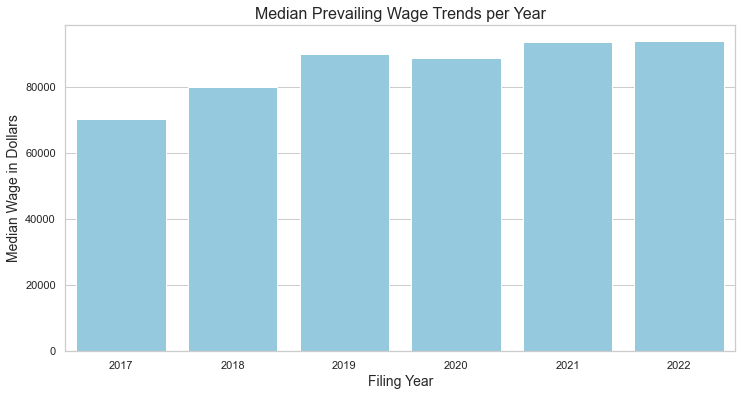

   Year  Prevailing_Wage
0  2017          70221.0
1  2018          80122.0
2  2019          90000.0
3  2020          88920.0
4  2021          93538.0
5  2022          94037.0


In [29]:
# Set the style for the plot
sns.set(style="whitegrid")

# Calculate median prevailing wage trends per year
dfsalaries_trends_year = merged_df.groupby('Year')['Prevailing_Wage'].median().reset_index()

# Plotting using seaborn for better visualization
plt.figure(figsize=(12, 6))
plot_salaries_trends_year = sns.barplot(x='Year', y='Prevailing_Wage', data=dfsalaries_trends_year, color='skyblue')
plt.title('Median Prevailing Wage Trends per Year', fontsize=16)
plt.xlabel('Filing Year', fontsize=14)
plt.ylabel('Median Wage in Dollars', fontsize=14)
plt.show()

# Print the DataFrame for reference
print(dfsalaries_trends_year)

- The median wage is increasing every year. 
- There has been atleast 10% increase in wages except in 2022.
- The year 2020 has seen a decrease in the median wage.

### 3.7 Top Job Titles

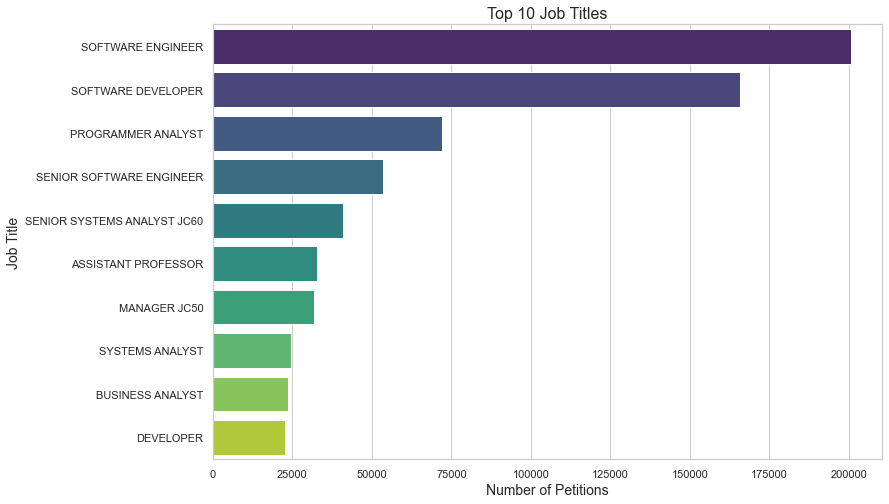

SOFTWARE ENGINEER              200542
SOFTWARE DEVELOPER             165696
PROGRAMMER ANALYST              72134
SENIOR SOFTWARE ENGINEER        53608
SENIOR SYSTEMS ANALYST JC60     40801
ASSISTANT PROFESSOR             32806
MANAGER JC50                    31743
SYSTEMS ANALYST                 24660
BUSINESS ANALYST                23610
DEVELOPER                       22670
Name: Job_Title, dtype: int64


In [30]:
# Set the style for the plot
sns.set(style="whitegrid")

# Get the top 10 job titles
top_job_titles = merged_df['Job_Title'].value_counts().nlargest(10)

# Plotting using seaborn for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')

# Set title and labels
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Number of Petitions', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

# Show the plot
plt.show()

# Print the value counts for reference
print(top_job_titles)

- The Job title, Software engineer and software developer are the Top 2 during 2017-2022.
- As we can see the Top 10 Job Title are from the Information Technology related fields.

### 3.8 Number of applications for the Full Time Positions

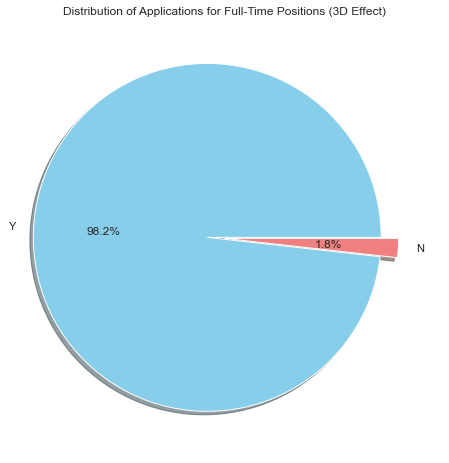

Y    3902850
N      70488
Name: Full_Time_Position, dtype: int64


In [32]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a 3D effect with explode
explode = (0.1, 0)

# Plotting a "pseudo-3D" pie chart for the distribution of full-time positions
plt.figure(figsize=(8, 8))
merged_df['Full_Time_Position'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=explode, shadow=True)
plt.title("Distribution of Applications for Full-Time Positions (3D Effect)")
plt.ylabel("")  # Remove y-axis label for better aesthetics
plt.show()

# Print the value counts for reference
print(merged_df['Full_Time_Position'].value_counts())

- We see almost 98% of the Job applied are 'Full Time Positions'.

## 4. Data Filtering and Downsampling for further Analysis

### 4.1 Filter the rows and keep the ones with case status as 'CERTIFIED' or 'DECLINED'

In [33]:
print(merged_df['Case_Status'].unique())
merged_df = merged_df.loc[merged_df['Case_Status'].isin(["CERTIFIED", "DENIED"])] #filtering

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED']


### 4.2 Remove rows with null values

In [34]:
merged_df.isnull().sum(axis = 0)

Visa_Class                  0
Employer_Name              59
SOC_Title                  13
Job_Title                   5
Full_Time_Position          6
Worksite               546164
Prevailing_Wage             8
Unit_Of_Pay                97
Employer_Location         493
Employer_Country        85985
Case_Status                 0
Year                        0
Quarter               1740246
dtype: int64

In [35]:
# dropping column 'Quarter' as it is no use for analysis.
merged_df = merged_df.drop('Quarter', axis=1)

In [36]:
merged_df2 = merged_df.dropna(axis=0, how='any', subset = ['Employer_Name', 'SOC_Title', 'Job_Title', 
                                                      'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 
                                                         'Unit_Of_Pay', 'Employer_Location', 'Employer_Country'])

In [37]:
merged_df2.isnull().sum(axis = 0)

Visa_Class            0
Employer_Name         0
SOC_Title             0
Job_Title             0
Full_Time_Position    0
Worksite              0
Prevailing_Wage       0
Unit_Of_Pay           0
Employer_Location     0
Employer_Country      0
Case_Status           0
Year                  0
dtype: int64

### 4.3 Find the number of certified and denied of all the needed columns with their count

In [38]:
print(merged_df.shape)
print(merged_df2.shape)

(3645905, 12)
(3013187, 12)


In [39]:
merged_df2.Case_Status.value_counts()

CERTIFIED    2985471
DENIED         27716
Name: Case_Status, dtype: int64

### 4.4 Downsampling the Data to match the ratio of certified and denied samples

In [40]:
table_2_Dx = merged_df2[merged_df2['Case_Status'] == 'DENIED']

In [41]:
table_2_Cx = merged_df2[merged_df2['Case_Status'] == 'CERTIFIED']
#table_2_Cx.duplicated(features_for_dup_removal).value_counts()

In [42]:
from sklearn.model_selection import train_test_split

Input_C, Input_C_extra, y_c, y_c_extra = train_test_split(merged_df2[merged_df2.Case_Status == 'CERTIFIED'],\
                                            table_2_Cx.Case_Status, train_size= 0.07, random_state=1)

#Input_C is the needed x axis data
#Input_c_extra is the eliminitated attributes data
#Same applied for the Y axis but as the values are "Certified" throughout, it doesn't matter

In [43]:
# appending the 'denied' related table to Input_C
training_dataframe = Input_C.append(table_2_Dx)

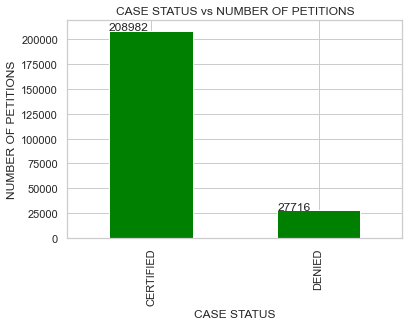

In [44]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['Case_Status'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

## 5. Features Creation and Categorisation

For the given categorical data, we need to convert it to numerical values.

There are three ways to convert the categorical data to numerical ones.

- Encoding to ordinal values
- Feature Hashing
- One-Hot Encoding

Prior selecting any of the above methods, it is necessary to get the details of the unique values for each of the columns/Features.

In [45]:
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236698 entries, 211092 to 626060
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Visa_Class          236698 non-null  object 
 1   Employer_Name       236698 non-null  object 
 2   SOC_Title           236698 non-null  object 
 3   Job_Title           236698 non-null  object 
 4   Full_Time_Position  236698 non-null  object 
 5   Worksite            236698 non-null  object 
 6   Prevailing_Wage     236698 non-null  float64
 7   Unit_Of_Pay         236698 non-null  object 
 8   Employer_Location   236698 non-null  object 
 9   Employer_Country    236698 non-null  object 
 10  Case_Status         236698 non-null  object 
 11  Year                236698 non-null  int32  
dtypes: float64(1), int32(1), object(10)
memory usage: 22.6+ MB


In [46]:
# one-hot encoding for every possible and needed column
print("Visa_Class ",training_dataframe.Visa_Class.nunique())
print("Employer_Name ",training_dataframe.Employer_Name.nunique())
print("SOC_Title ",training_dataframe.SOC_Title.nunique())
print("Job_Title ", training_dataframe.Job_Title.nunique())
print("Full_Time_Position ",training_dataframe.Full_Time_Position.nunique())
print("Year ",training_dataframe.Year.nunique())
print("Worksite ",training_dataframe.Worksite.nunique())
print("Case Status ",training_dataframe.Case_Status.nunique())
print("Prevailing_Wage ",training_dataframe.Prevailing_Wage.nunique())

Visa_Class  4
Employer_Name  54626
SOC_Title  1007
Job_Title  62519
Full_Time_Position  2
Year  6
Worksite  9314
Case Status  2
Prevailing_Wage  24572


### 5.1 Feature Categorisation Functions

In [47]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [48]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [49]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

### 5.2 Feature Creation for One-Hot Encoding

In [50]:
training_dataframe['Worksite'] = training_dataframe['Worksite'].apply(state_extractor)

In [51]:
training_dataframe.Worksite.unique()

array(['PENNSYLVANIA', 'TEXAS', 'TENNESSEE', 'ILLINOIS', 'CALIFORNIA',
       'WASHINGTON', 'VIRGINIA', 'NEVADA', 'MINNESOTA', 'NORTH CAROLINA',
       'MICHIGAN', 'NEW YORK', 'NEW JERSEY', 'MISSOURI', 'DELAWARE',
       'MASSACHUSETTS', 'IDAHO', 'OREGON', 'SOUTH CAROLINA', 'OHIO',
       'GEORGIA', 'MARYLAND', 'WISCONSIN', 'ARIZONA', 'CONNECTICUT',
       'LOUISIANA', 'ALABAMA', 'COLORADO', 'ARKANSAS', 'KENTUCKY', 'IOWA',
       'FLORIDA', 'INDIANA', 'RHODE ISLAND', 'DISTRICT OF COLUMBIA',
       'MISSISSIPPI', 'NEW HAMPSHIRE', 'OKLAHOMA', 'KANSAS', 'NEW MEXICO',
       'NORTH DAKOTA', 'SOUTH DAKOTA', 'UTAH', 'NEBRASKA', 'HAWAII',
       'WEST VIRGINIA', 'GUAM', 'NY', 'DC', 'VERMONT', 'MONTANA', '',
       'NORTHERN MARIANA ISLANDS', 'WYOMING', 'MAINE', 'ALASKA',
       'PUERTO RICO', 'CA 95110', 'CA', 'D.C.', 'NJ', 'JERSEY CITY',
       'ATLANTA', 'NE', 'CT', ' ', 'VA 22102', 'U.S. VIRGIN ISLANDS',
       'BEAVERTON', 'OH', 'TX ', 'PAUL', 'FL ', 'SUFFOLK', 'FL',
       'BLUE ASH', 'E

In [52]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['Prevailing_Wage'].apply(wage_categorization)

In [53]:
training_dataframe_1 = training_dataframe.loc[:,['Employer_Name', 'Case_Status']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_Title', 'Case_Status']]
training_dataframe_1j = training_dataframe.loc[:,['Job_Title', 'Case_Status']]

In [54]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.Case_Status == 'CERTIFIED'].Employer_Name
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.Case_Status == 'CERTIFIED'].SOC_Title
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.Case_Status == 'CERTIFIED'].Job_Title
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [55]:
total_counts = training_dataframe_1.Employer_Name.value_counts()
total_counts_s = training_dataframe_1s.SOC_Title.value_counts()
total_counts_j = training_dataframe_1j.Job_Title.value_counts()

In [56]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.Employer_Name.map(final_classification_employer)

In [57]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_Title.map(final_classification_soc)

In [58]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.Job_Title.map(final_classification_job)

In [59]:
training_dataframe

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Year,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE
211092,H-1B,XORIANT CORPORATION,"SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR SOFTWARE ARCHITECT,Y,PENNSYLVANIA,115000.00,Year,"Sunnyvale, California",United States Of America,CERTIFIED,2019,HIGH,VHA,VHA,VHA
224298,H-1B,"NOBLESOFT SOLUTIONS, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SQL BUSINESS INTELLIGENCE DEVELOPER,Y,TEXAS,94037.00,Year,"Langhorne, Pennsylvania",United States Of America,CERTIFIED,2022,HIGH,VHA,VHA,VHA
540113,H-1B,"SCHNEIDER ELECTRIC BUILDINGS AMERICAS, INC.",ELECTRICAL ENGINEERS,APPLICATION DESIGN ENGINEER,Y,TENNESSEE,79747.00,Year,"Boston , Massachusetts",United States Of America,CERTIFIED,2020,MEDIUM,HA,VHA,VHA
286490,H-1B,DFS CORPORATE SERVICES LLC,"SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR ASSOCIATE APPLICATION ENGINEER,Y,ILLINOIS,90397.00,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED,2022,HIGH,VHA,VHA,VHA
49292,H-1B,"CISCO SYSTEMS, INC.",MARKETING MANAGERS,"MANAGER, PRODUCT MANAGEMENT",Y,CALIFORNIA,180649.00,Year,"San Jose, California",United States Of America,CERTIFIED,2018,VERY HIGH,VHA,HA,VHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624475,E-3 Australian,RESOURCE MOBILIZATION ADVISORS,"ENERGY ENGINEERS, EXCEPT WIND AND SOLAR",SENIOR ENGINEER,Y,DISTRICT OF COLUMBIA,78.68,Hour,"Washignton, District of Columbia",United States Of America,DENIED,2022,VERY LOW,AR,VHA,VHA
624476,H-1B,"COMPUNNEL SOFTWARE GROUP, INC",COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,SYTEMS ENGINEER,Y,CALIFORNIA,108347.00,Year,"Plainsboro, New Jersey",United States Of America,DENIED,2022,HIGH,VHA,VHA,AR
624477,H-1B1 Chile,ACRO GRAVITY ACADEMY LLC,MANAGEMENT ANALYSTS,MANAGEMENT CONSULTANT,N,FLORIDA,23.73,Hour,"North Miami, Florida",United States Of America,DENIED,2022,VERY LOW,AR,VHA,MA
626059,E-3 Australian,AUTISM BEHAVIORAL SPECIALISTS LLC,SPEECH-LANGUAGE PATHOLOGISTS,SPEECH LANGUAGE PATHOLOGIST,Y,FLORIDA,49.12,Hour,"Coral Springs, Florida",United States Of America,DENIED,2022,VERY LOW,AR,HA,HA


In [60]:
print("Visa_Class ",training_dataframe.Visa_Class.nunique())
print("Employer_Name ",training_dataframe.Employer_Name.nunique())
print("SOC_Title ",training_dataframe.SOC_Title.nunique())
print("Job_Title ", training_dataframe.Job_Title.nunique())
print("Full_Time_Position ",training_dataframe.Full_Time_Position.nunique())
print("Year ",training_dataframe.Year.nunique())
print("Worksite ",training_dataframe.Worksite.nunique())
print("Case Status ",training_dataframe.Case_Status.nunique())
print("Prevailing_Wage ",training_dataframe.Prevailing_Wage.nunique())

Visa_Class  4
Employer_Name  54626
SOC_Title  1007
Job_Title  62519
Full_Time_Position  2
Year  6
Worksite  112
Case Status  2
Prevailing_Wage  24572


In [61]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['Case_Status'] = training_dataframe['Case_Status'].apply(lambda x: dict_cs[x])
    training_dataframe['Full_Time_Position'] = training_dataframe['Full_Time_Position'].apply(lambda x: dict_fp[x])
except:
    pass

In [62]:
training_dataframe['Year'] = training_dataframe['Year'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['Case_Status', 'Year',\
                                                'Worksite', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'Full_Time_Position']]
training_dataframe.head()

,Case_Status,Year,Worksite,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,Full_Time_Position
1,1,2021,TEXAS,MEDIUM,VHA,VHA,VHA,1
4,1,2018,ALABAMA,MEDIUM,VHA,VHA,VHA,1
7,1,2021,CALIFORNIA,VERY HIGH,VHA,VHA,VHA,1
8,1,2020,GEORGIA,MEDIUM,VHA,VHA,VHA,1
18,1,2022,MICHIGAN,MEDIUM,VHA,HA,HA,1


### 5.3 Apply One-hot encoding

In [63]:
final_df_train = pd.get_dummies(training_dataframe, columns=['Year', 'Worksite', 'Full_Time_Position', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,Case_Status,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Worksite_,Worksite_3RD FLOOR,Worksite_7TH FLOO,Worksite_AL,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### 5.4 RFE for feature elimination

In [64]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
y_train[y_train==1].shape
#y_test[y_test==1].shape

(167148,)

In [65]:
X_train.head()

,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Worksite_,Worksite_3RD FLOOR,Worksite_7TH FLOO,Worksite_AL,Worksite_ALABAMA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
162350,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
206926,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
538654,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8278,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
124751,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## 6. Training classifiers

### 6.1 Decision Tree Model

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)  

In [67]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))
print("Decision Tree Accuracy= ", metrics.accuracy_score(y_test, y_pred))

Decision_Tree_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Precision Score = ",metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
print("Decision Tree Recall Score= ",metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
print("Decision Tree f1 Score= ",metrics.f1_score(y_test,y_pred))

test 463204    1
456886    1
161193    1
212437    1
298359    1
132545    1
194560    1
469754    1
509443    1
447591    1
Name: Case_Status, dtype: int64
pred [1 1 1 1 1 1 1 1 1 1]

[[ 4074  1432]
 [  621 41213]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      5506
           1       0.97      0.99      0.98     41834

    accuracy                           0.96     47340
   macro avg       0.92      0.86      0.89     47340
weighted avg       0.95      0.96      0.96     47340

Decision Tree Accuracy=  0.9566328686100549
Decision Tree Precision Score =  0.966420447883691
Decision Tree Recall Score=  0.9851556150499594
Decision Tree f1 Score=  0.9756981024870085


### 6.2 Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

C:\Users\SAI CHARAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy= ",metrics.accuracy_score(y_test, y_pred_lr))

Logistic_accuracy_score = metrics.accuracy_score(y_test, y_pred_lr)
print("Logistic Regression precision_score= ",metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
print("Logistic Regression recall_score= ",metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
print("Logistic Regression f1_score= ",metrics.f1_score(y_test,y_pred))

test 463204    1
456886    1
161193    1
212437    1
298359    1
132545    1
194560    1
469754    1
509443    1
447591    1
Name: Case_Status, dtype: int64
pred [1 1 1 1 1 1 1 1 1 1]
[[ 3941  1565]
 [  312 41522]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      5506
           1       0.96      0.99      0.98     41834

    accuracy                           0.96     47340
   macro avg       0.95      0.85      0.89     47340
weighted avg       0.96      0.96      0.96     47340

Logistic Regression Accuracy=  0.9603506548373468
Logistic Regression precision_score=  0.966420447883691
Logistic Regression recall_score=  0.9851556150499594
Logistic Regression f1_score=  0.9756981024870085


### 6.3 Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [71]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:20])
print("pred", y_pred[:20])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy= ",metrics.accuracy_score(y_test, y_pred_rf))

Random_forest_accuracy_score = metrics.accuracy_score(y_test, y_pred_rf)
print("Random Forest precision_score= ",metrics.precision_score(y_test,y_pred_rf))   # Parameter "average" is requred if not a binary model
print("Random Forest recall_score= ",metrics.recall_score(y_test,y_pred))
print("Random Forest f1_score= ",metrics.f1_score(y_test, y_pred))# Parameter "average" is requred if not a binary model

test 463204    1
456886    1
161193    1
212437    1
298359    1
132545    1
194560    1
469754    1
509443    1
447591    1
480178    1
158445    0
204212    1
264923    1
66000     1
57364     0
156152    1
267865    1
73385     1
518901    1
Name: Case_Status, dtype: int64
pred [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]
[[ 4035  1471]
 [  564 41270]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      5506
           1       0.97      0.99      0.98     41834

    accuracy                           0.96     47340
   macro avg       0.92      0.86      0.89     47340
weighted avg       0.96      0.96      0.96     47340

Random Forest Accuracy=  0.957013096746937
Random Forest precision_score=  0.9655833976743642
Random Forest recall_score=  0.9851556150499594
Random Forest f1_score=  0.9756981024870085


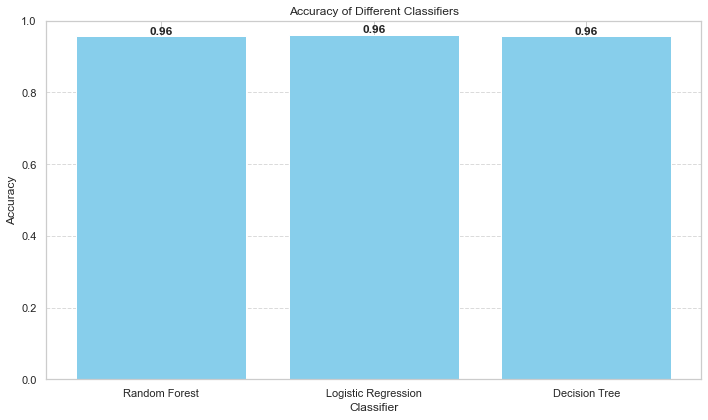

In [72]:
# Provided accuracy scores
accuracy_scores = {
    'Random Forest': Random_forest_accuracy_score,
    'Logistic Regression': Logistic_accuracy_score,
    'Decision Tree': Decision_Tree_accuracy_score
}

# Extract classifier names and accuracy scores
classifiers = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0.0, 1.0)  # Set the y-axis range (0 to 1 for accuracy)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the accuracy scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


- The Accuracy for all the 3 classifiers, Random Forest, Logistic Regression, and Decision Tree are almost same 96%.